In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('marketing_data.csv')
print(data.shape)
data.head()

(2240, 28)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2005/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2004/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
# Deal with data types 
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
# data.isnull().sum() # Income contains 24 missing values
# Deal with data types
#data[' Income '] = data[' Income '].map(lambda x: str(x)[:-4])
# data[' Income '] = data[' Income '].map(lambda x: x.replace('$', '').replace(',', ''))
data[' Income '] = data[' Income '].astype(float)

## Section 01: Exploratory Data Analysis
* Are there any null values or outliers? How will you wrangle/handle them?
  --> Income：fill mean by marital status
* Are there any variables that warrant transformations?
  --> Income
* Are there any useful variables that you can engineer with the given data?
  --> Age：today - Birthdate
* Do you notice any patterns or anomalies in the data? Can you plot them?
  --> Income vs Marital / Education

In [5]:
country = dict(data.Country.value_counts())
education = dict(data.Education.value_counts())
marriage = dict(data.Marital_Status.value_counts())
print(country, education, marriage)
complain = dict(data.Complain.value_counts())
response = dict(data.Response.value_counts())
print(complain, response)

countrycols = ["#0F166C", "#55415f", "#646964", "#d77355", "#508cd7", "#64b964", "#e6c86e", "#dcf5ff"]
edcols = ["#81AFE1", "#005951", "#FCFCD4", "#DD97B1", "#A5637C"]
marcols = ["#722280", "#FF8755", "#00AAC7", "#0073C8", "#E75366", "#FFC053", "#00C0B7", "#4850AD"]

{'SP': 1095, 'SA': 337, 'CA': 268, 'AUS': 160, 'IND': 148, 'GER': 120, 'US': 109, 'ME': 3} {'Graduation': 1127, 'PhD': 486, 'Master': 370, '2n Cycle': 203, 'Basic': 54} {'Married': 864, 'Together': 580, 'Single': 480, 'Divorced': 232, 'Widow': 77, 'Alone': 3, 'YOLO': 2, 'Absurd': 2}
{0: 2219, 1: 21} {0: 1906, 1: 334}


In [6]:
from matplotlib import pyplot as plt
#from matplotlib.ticker import MaxNLocator
#import seaborn as sns

In [7]:
nd = data.dropna()#.head(1000)
print(nd.shape)

(2216, 28)


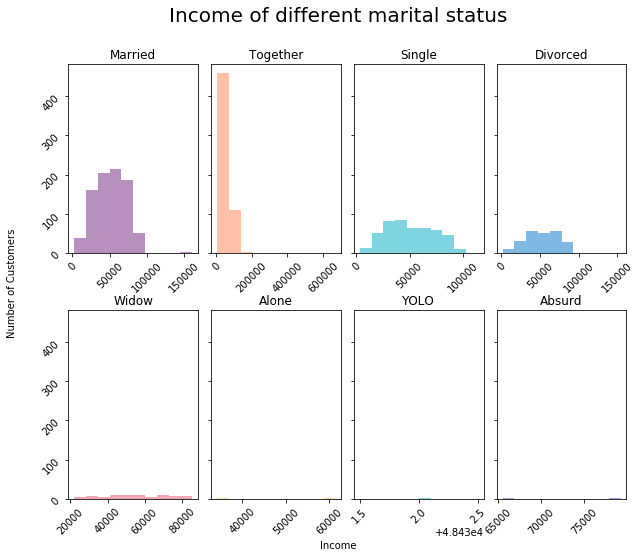

In [13]:
mar_list = np.reshape(list(marriage.keys()), (2, 4))
colors = np.reshape(marcols, (2, 4))

fig, axs = plt.subplots(2, 4, figsize = (10, 8), gridspec_kw = {'wspace':0.1, 'hspace':0.3}, 
                        sharey = True)
fig.text(0.5, 0.04, 'Income', ha = 'center')
fig.text(0.04, 0.5, 'Number of Customers', va = 'center', rotation = 'vertical')
fig.suptitle('Income of different marital status', size = 20)

for i in range(2):
    for j in range(4):
        x = nd.loc[nd.Marital_Status == mar_list[i][j], ' Income ']
        axs[i][j].hist(x, label = mar_list[i][j], color = colors[i][j], alpha = 0.5)
        axs[i][j].set_title(mar_list[i][j])
        axs[i][j].tick_params(labelrotation = 45)

In [9]:
'''
mar_list = np.reshape(list(marriage.keys()), (4, 2))
colors = np.reshape(marcols, (4, 2))
fig, axs = plt.subplots(4, 2, figsize = (8, 10), gridspec_kw = {'wspace':0.1}, 
                        sharey = True, squeeze = False)

fig.text(0.5, 0.04, 'Number of Customers', ha = 'center')
fig.text(0, 0.5, 'Income', va = 'center', rotation = 'vertical')
fig.suptitle('Income of different marital status', size = 20, y = 0.93)

for i in range(2):
    for j in range(4):
        x = nd.loc[nd.Marital_Status == mar_list[j][i], ' Income ']
        sns.distplot(x, label = mar_list[j][i], color = colors[j][i], ax=axs[j,i], kde_kws = {'bw' : 1.2})
        axs[j][i].set_title(mar_list[j][i], y = 0.5)
        axs[j][i].tick_params(labelrotation = 45)
'''

"\nmar_list = np.reshape(list(marriage.keys()), (4, 2))\ncolors = np.reshape(marcols, (4, 2))\nfig, axs = plt.subplots(4, 2, figsize = (8, 10), gridspec_kw = {'wspace':0.1}, \n                        sharey = True, squeeze = False)\n\nfig.text(0.5, 0.04, 'Number of Customers', ha = 'center')\nfig.text(0, 0.5, 'Income', va = 'center', rotation = 'vertical')\nfig.suptitle('Income of different marital status', size = 20, y = 0.93)\n\nfor i in range(2):\n    for j in range(4):\n        x = nd.loc[nd.Marital_Status == mar_list[j][i], ' Income ']\n        sns.distplot(x, label = mar_list[j][i], color = colors[j][i], ax=axs[j,i], kde_kws = {'bw' : 1.2})\n        axs[j][i].set_title(mar_list[j][i], y = 0.5)\n        axs[j][i].tick_params(labelrotation = 45)\n"

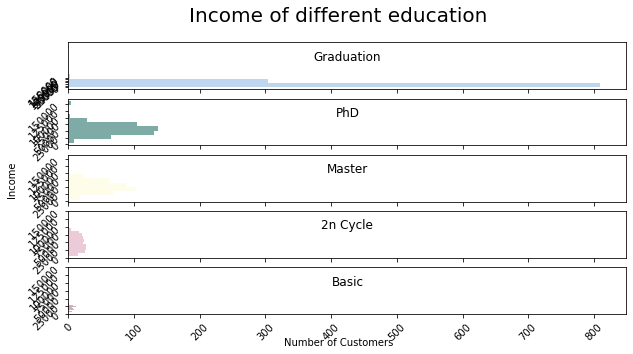

In [10]:
ed_list = list(education.keys())
fig, axs = plt.subplots(5, 1, figsize = (10, 5), gridspec_kw = {'wspace':0.1}, 
                        sharex = True, squeeze = False)

fig.text(0.5, 0.04, 'Number of Customers', ha = 'center')
fig.text(0.04, 0.5, 'Income', va = 'center', rotation = 'vertical')
fig.suptitle('Income of different education', size = 20)

for i in range(5):
    x = nd.loc[nd.Education == ed_list[i], ' Income ']
    axs[i][0].hist(x, orientation = 'horizontal', label = ed_list[i], color = edcols[i], alpha = 0.5)
    axs[i][0].set_title(ed_list[i], y = 0.5)
    axs[i][0].set_yticks([0, 25000, 50000, 75000, 100000, 125000, 150000])
    axs[i][0].tick_params(labelrotation = 45)

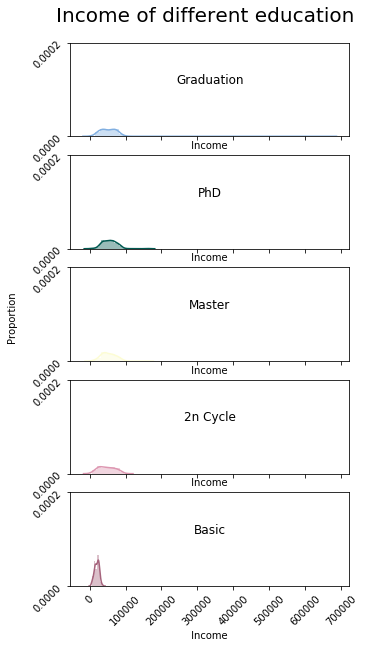

In [14]:
nd = data.dropna()
ed_list = list(education.keys())
fig, axs = plt.subplots(5, 1, figsize = (5, 10), gridspec_kw = {'wspace':0.1}, 
                        sharex = True, squeeze = False)

# fig.text(0.5, 0.04, 'Number of Customers', ha = 'center')
fig.text(-0.05, 0.5, 'Proportion', va = 'center', rotation = 'vertical')
fig.suptitle('Income of different education', size = 20, y = 0.93)

for i in range(5):
    x = nd.loc[nd.Education == ed_list[i], ' Income ']
    sns.distplot(x, label = ed_list[i], color = edcols[i], ax=axs[i,0])
    axs[i][0].set_title(ed_list[i], y = 0.5)
    axs[i][0].set_yticks([0, 0.0002])
    axs[i][0].tick_params(labelrotation = 45)

In [15]:
# Deal with missing values --> 24 Incomes
print('Income Mean', np.mean(data[' Income ']))
print('Income std', np.std(data[' Income ']))
income_list = sorted(list(data[' Income '].dropna()))
step = 10000
curr_bar = 10000
for i in range(1, len(income_list)):
    if (income_list[i-1] >= curr_bar) and (income_list[i] <= curr_bar + step):
        print("Last position for", curr_bar, "is", i)
        curr_bar += step

Income Mean 52247.25135379061
Income std 25167.39617416296
Last position for 10000 is 30
Last position for 20000 is 128
Last position for 30000 is 371
Last position for 40000 is 733
Last position for 50000 is 1061
Last position for 60000 is 1375
Last position for 70000 is 1709
Last position for 80000 is 2000
Last position for 90000 is 2163
Last position for 100000 is 2204


In [16]:
loss_mar = list(data[data[' Income '].isnull()].Marital_Status.unique())
print(loss_mar)

['Married', 'Together', 'Single', 'Widow']


In [17]:
deal_data = data[data[' Income '].isnull()]
print(deal_data.shape)

#data.fillna(0)
loss_mean = []
for i in range(len(loss_mar)):
    loss_mean.append(np.mean(data[data['Marital_Status'] == loss_mar[i]][' Income ']))
print(loss_mean)

for i in range(len(loss_mar)):
    print(loss_mar[i])
    data.loc[data['Marital_Status'] == loss_mar[i], ' Income '] = loss_mean[i]

(24, 28)
[51724.97899649942, 53245.53403141361, 50995.35031847134, 56481.55263157895]
Married
Together
Single
Widow


In [45]:
#data.isnull().sum() # Filled NA by Marital Status

### Customers Analysis

In [18]:
# We lack 'Age' data, so we create by subtracting year to birth year
data['Age'] = 2021 - data['Year_Birth']
print('Average Age：', np.mean(data['Age']))
print('Std of Age：', np.std(data['Age']))

Average Age： 52.19419642857143
Std of Age： 11.981394142764575


In [19]:
# Have children vs No children
data['Children'] = data['Kidhome'] + data['Teenhome']
# print(data[data['Children'] > 0].shape[0])
# data['Children'].value_counts()
print("No Children：", 638, np.round(638/data.shape[0], 2) * 100, "%")
print("Have Children：", 1602, np.round(1602/data.shape[0], 2) * 100, "%")

No Children： 638 28.000000000000004 %
Have Children： 1602 72.0 %


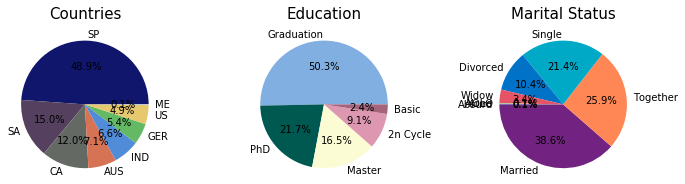

In [21]:
fig, axs = plt.subplots(1, 3, figsize = (10, 5), sharex = True, sharey = True,
                        gridspec_kw = {'wspace': 2, 'hspace':2})

axs[0].pie(country.values(), labels = country.keys(), autopct='%1.1f%%', radius = 2, 
           colors = countrycols)
axs[0].set_title('Countries', y = 1.5, size = 15)
axs[1].pie(education.values(), labels = education.keys(), autopct='%1.1f%%', radius = 2, 
           colors = edcols)
axs[1].set_title('Education', y = 1.5, size = 15)
axs[2].pie(marriage.values(), labels = marriage.keys(), autopct='%1.1f%%', radius = 2, 
           startangle = 180, colors = marcols)
axs[2].set_title('Marital Status', y = 1.5, size = 15)
#axs[1, 1].pie(education.values(), labels = education.keys(), autopct='%1.1f%%', radius = 2)
#plt.legend()
plt.show()

### Statistical Analysis

* What factors are significantly related to the number of store purchases? --> items purchased
* Does US fare significantly better than the Rest of the World in terms of total purchases? --> No.
* Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test.
* Is there a significant relationship between geographical regional and success of a campaign?

In [22]:
# Food are more likely to be bought directly at store
# Wine and Meat(already have a high correlation) are highly correlated with Catalog Purchase
data_dummies = pd.get_dummies(data, columns = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Country'], drop_first=False)
#data_dummies[['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].corr()

In [23]:
# data_dummies.drop(['ID', 'Year_Birth'], axis = 1).corr()
#data_dummies.columns

In [24]:
coun = list(country.keys())
items = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
nums = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
total_purchase = []
for j in range(len(coun)):
    # print("\nCurrent Country：", coun[j])
    c = data[data['Country'] == coun[j]]
    temp = []
    for i in range(len(items)):
        temp.append(c[items[i]].sum())
        # print(str(items[i]), c[items[i]].sum(), "mean：", np.round(np.mean(c[items[i]]), 2))
    total_purchase.append(temp)

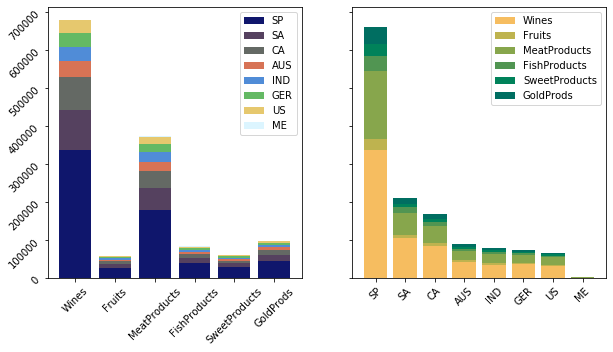

In [25]:
items = ['Wines','Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts','GoldProds']
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey = True)
ax[0].bar(items, total_purchase[0], label=coun[0], color = countrycols[0])
ax[0].tick_params(labelrotation = 45)

#print(np.array(total_purchase).shape)
for i in range(1, len(total_purchase)):
    bott = [sum(m) for m in zip(*total_purchase[0:i])]
    ax[0].bar(items, total_purchase[i], bottom = bott, label=coun[i], color = countrycols[i])
ax[0].legend()

total_by_country = np.array(total_purchase).T
itemcols = ["#F6BD60", "#BEB34F", "#87A64C", "#519552", "#00825A", "#006E61"]
ax[1].bar(coun, total_by_country[0], label=items[0], color = itemcols[0])
ax[1].tick_params(labelrotation = 45)

#print(total_by_country.shape)
for i in range(1, len(items)):
    bott = [sum(m) for m in zip(*total_by_country[0:i])]
    ax[1].bar(coun, total_by_country[i], bottom = bott, label = items[i], color = itemcols[i])
ax[1].legend()

In [50]:
# Analyze Gold Products
gold = data[['MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']] # 2240
print("Store Purchase：", gold['NumStorePurchases'].sum(), gold[gold['NumStorePurchases'] > 0].shape[0])
print("Category Purchase：", gold['NumCatalogPurchases'].sum(), gold[gold['NumCatalogPurchases'] > 0].shape[0])
print("Web Purchase：", gold['NumWebPurchases'].sum(), gold[gold['NumWebPurchases'] > 0].shape[0])

# Only bought in store
mk0 = gold['NumStorePurchases'] > 0
print("\nTotal customers that bought gold from store：", gold[mk0].shape[0])
mk1 = (gold['NumStorePurchases'] > 0) & (gold['NumCatalogPurchases'] == 0) & ((gold['NumWebPurchases'] == 0))
print("Customers that only bought gold from store：", gold[mk1].shape[0], " Total amount bought：", gold[mk1]['MntGoldProds'].sum())
mk2 = (gold['NumStorePurchases'] == 0) #& (gold['NumCatalogPurchases'] > 0) | ((gold['NumWebPurchases'] > 0))
print("Customers didn't buy gold from store：", gold[mk2].shape[0]) # 沒有catalog&web --> 只會擇一管道買
mk3 = (gold['NumStorePurchases'] == 0) & (gold['NumCatalogPurchases'] == 0) & ((gold['NumWebPurchases'] == 0))
print("Customers that never bought any gold from three methods：", gold[mk3].shape[0])
mk4 = gold['MntGoldProds'] == 0
print("Customers that haven't bought gold in last 2 years：", gold[mk4].shape[0])

print("\nAverage amount of gold products：", int(np.mean(gold['MntGoldProds'])))
high_gold = gold[gold['MntGoldProds'] >= 44]
print("People buying gold products above average：", high_gold.shape[0])

m0 = high_gold['NumStorePurchases'] > 0
print("\nTotal customers that bought gold from store：", high_gold[m0].shape[0])
m1 = (high_gold['NumStorePurchases'] > 0) & (high_gold['NumCatalogPurchases'] == 0) & ((high_gold['NumWebPurchases'] == 0))
print("Customers that only bought gold from store：", high_gold[m1].shape[0], " Total amount bought：", high_gold[m1]['MntGoldProds'].sum())
m2 = (high_gold['NumStorePurchases'] == 0) #& (high_gold['NumCatalogPurchases'] > 0) | ((high_gold['NumWebPurchases'] > 0))
print("Customers didn't buy gold from store：", high_gold[m2].shape[0]) # 沒有catalog&web --> 只會擇一管道買
m3 = (high_gold['NumStorePurchases'] == 0) & (high_gold['NumCatalogPurchases'] == 0) & ((high_gold['NumWebPurchases'] == 0))
print("Customers that never bought any gold from three methods：", high_gold[m3].shape[0])
m4 = high_gold['MntGoldProds'] == 0
print("Customers that haven't bought gold in last 2 years：", high_gold[m4].shape[0])

Store Purchase： 12970 2225
Category Purchase： 5963 1654
Web Purchase： 9150 2191

Total customers that bought gold from store： 2225
Customers that only bought gold from store： 31  Total amount bought： 133
Customers didn't buy gold from store： 15
Customers that never bought any gold from three methods： 6
Customers that haven't bought gold in last 2 years： 61

Average amount of gold products： 44
People buying gold products above average： 704

Total customers that bought gold from store： 702
Customers that only bought gold from store： 0  Total amount bought： 0
Customers didn't buy gold from store： 2
Customers that never bought any gold from three methods： 0
Customers that haven't bought gold in last 2 years： 0


### Campaign Analysis

In [33]:
camp_list = ['Age', 'Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
             'AcceptedCmp4','AcceptedCmp5', 'Country_AUS', 'Country_CA',
             'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA', 'Country_SP',
             'Country_US']
campaign = data_dummies[camp_list]
campaign.corr()

,Age,Recency,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
Age,1.000000,0.019871,0.005930,0.006539,-0.061774,0.060510,-0.007123,0.029649,0.022268,0.001605,-0.047960,-0.010782,-0.013178,0.000026,0.008283
Recency,0.019871,1.000000,-0.019283,-0.001781,-0.032991,0.018826,0.000129,-0.023497,-0.029088,0.002388,0.010788,-0.028383,0.004664,0.020209,0.007171
AcceptedCmp1,0.005930,-0.019283,1.000000,0.175315,0.094751,0.251300,0.403078,-0.023223,0.004327,-0.005774,-0.018424,-0.009599,-0.008474,0.027700,-0.000060
AcceptedCmp2,0.006539,-0.001781,0.175315,1.000000,0.072020,0.292210,0.221533,-0.032314,0.028848,0.006776,0.000279,-0.004267,-0.005577,0.010371,-0.026350
AcceptedCmp3,-0.061774,-0.032991,0.094751,0.072020,1.000000,-0.079512,0.080316,-0.017637,-0.007953,0.009677,0.015431,0.036735,-0.016935,0.011412,0.000546
AcceptedCmp4,0.060510,0.018826,0.251300,0.292210,-0.079512,1.000000,0.306526,-0.039124,0.021050,0.015500,-0.000232,-0.010394,-0.024362,0.025037,-0.016796
AcceptedCmp5,-0.007123,0.000129,0.403078,0.221533,0.080316,0.306526,1.000000,0.009057,0.007934,-0.005588,-0.033000,-0.010259,-0.016935,0.032041,-0.023418
Country_AUS,0.029649,-0.023497,-0.023223,-0.032314,-0.017637,-0.039124,0.009057,1.000000,-0.102245,-0.065986,-0.073770,-0.010157,-0.116714,-0.271227,-0.062726
Country_CA,0.022268,-0.029088,0.004327,0.028848,-0.007953,0.021050,0.007934,-0.102245,1.000000,-0.087707,-0.098054,-0.013500,-0.155135,-0.360511,-0.083375
Country_GER,0.001605,0.002388,-0.005774,0.006776,0.009677,0.015500,-0.005588,-0.065986,-0.087707,1.000000,-0.063281,-0.008713,-0.100119,-0.232663,-0.053808


In [42]:
#coun = list(country.keys())
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
             'AcceptedCmp4','AcceptedCmp5']

# Campaign 3 in Mexico
total_accepts = []
average_accepts = []
for j in range(len(coun)):
    #print("\nCurrent Country：", coun[j])
    c = data[data['Country'] == coun[j]]
    temp1 = []
    temp2 = []
    for i in range(len(campaigns)):
        temp1.append(c[campaigns[i]].sum())
        temp2.append(np.round(np.mean(c[campaigns[i]]), 2))
        #print(str(campaigns[i]), c[campaigns[i]].sum(), "mean：", np.round(np.mean(c[campaigns[i]]), 2))
    total_accepts.append(temp1)
    average_accepts.append(temp2)

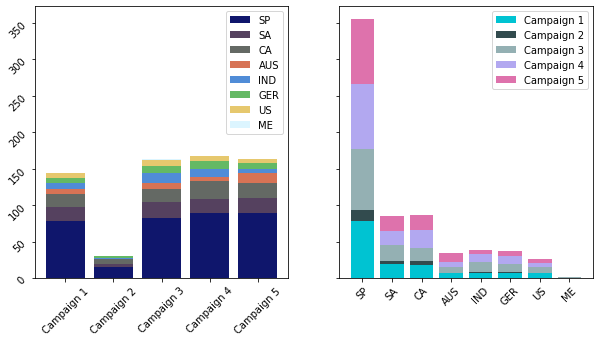

In [60]:
# plot accepted campaigns among different countries
campaigns = ['Campaign 1', 'Campaign 2', 'Campaign 3', 
             'Campaign 4','Campaign 5']
fig, ax = plt.subplots(1, 2, figsize = (10, 5), sharey = True)
ax[0].bar(campaigns, total_accepts[0], label=coun[0], color = countrycols[0])
ax[0].tick_params(labelrotation = 45)

#print(np.array(total_purchase).shape)
for i in range(1, len(total_accepts)):
    bott = [sum(m) for m in zip(*total_accepts[0:i])]
    ax[0].bar(campaigns, total_accepts[i], bottom = bott, label=coun[i], color = countrycols[i])
ax[0].legend()

tta_by_country = np.array(total_accepts).T
campcols = ["#00C3D2", "#324B4E", "#94B0B3", "#B2A8F0", "#DE72AC"]
ax[1].bar(coun, tta_by_country[0], label=campaigns[0], color = campcols[0])
ax[1].tick_params(labelrotation = 45)

#print(total_by_country.shape)
for i in range(1, len(campaigns)):
    bott = [sum(m) for m in zip(*tta_by_country[0:i])]
    ax[1].bar(coun, tta_by_country[i], bottom = bott, label = campaigns[i], color = campcols[i])
ax[1].legend()

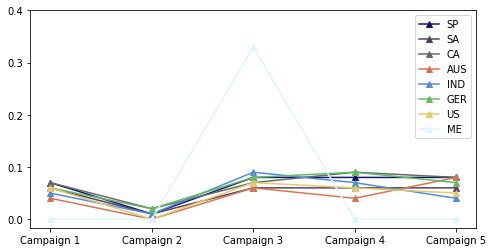

In [61]:
plt.figure(figsize = (8, 4))
for i in range(len(coun)):
    plt.plot(campaigns, average_accepts[i], label=coun[i], color = countrycols[i], marker = "^")
plt.yticks([0, 0.1, 0.2, 0.3, 0.4])
plt.legend()

### Analyze purchased items

In [20]:
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age', 'Children'],
      dtype='object')


In [21]:
from datetime import datetime, timedelta, date

In [22]:
items = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
# Because these items were purchased within last two years, me must consider data by recency
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], yearfirst = True)
today = datetime.now()
data['total_days'] = (today - data['Dt_Customer']).dt.days

In [23]:
data.head(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Children,total_days
0,1826,1970,Graduation,Divorced,84835.000000,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,SP,51,0,2473
1,1,1961,Graduation,Single,50995.350318,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,CA,60,0,2474
2,10476,1958,Graduation,Married,51724.978996,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,US,63,1,2507


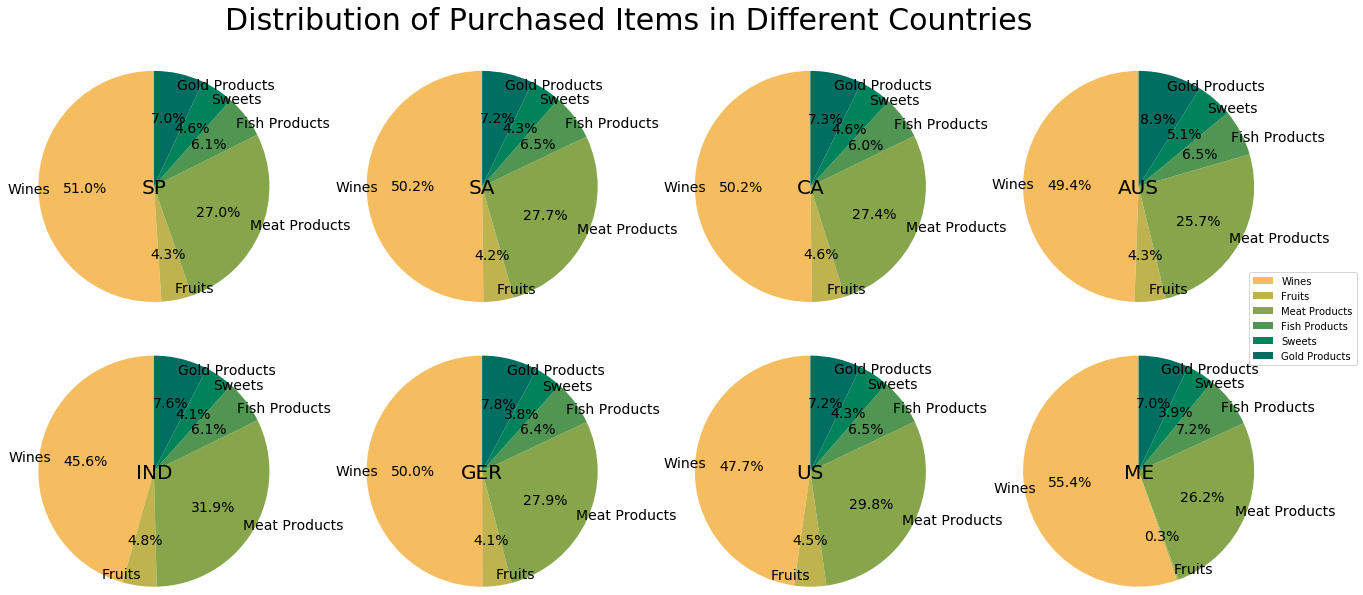

In [24]:
country_list = np.reshape(list(country.keys()), (2, 4))
# print(len(country_list))
colors = ["#F6BD60", "#BEB34F", "#87A64C", "#519552", "#00825A", "#006E61"]
labels = ['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweets', 'Gold Products']

fig, axs = plt.subplots(2, 4, figsize = (20, 10), sharex = True, sharey = True,
                        gridspec_kw = {'wspace': 1.5, 'hspace':0.1})
fig.suptitle('Distribution of Purchased Items in Different Countries', size = 30, y = 0.95)

for i in range(2):
    for j in range(4):
        # print(country_list[i][j])
        x = data[data['Country'] == country_list[i][j]]
        pur_item = list(x[items].apply(sum))
        axs[i][j].pie(pur_item, labels = labels, radius = 2.2, 
                      autopct='%1.1f%%', textprops={'fontsize': 14}, labeldistance = 0.9,
                      colors = colors, startangle = 90)
        axs[i][j].set_title(country_list[i][j], size = 20, y = 0.4)
axs[0][3].legend(loc = 'lower right', bbox_to_anchor=(2.2, -0.9), 
                 labels = labels)
    

### Analyze purchase channel

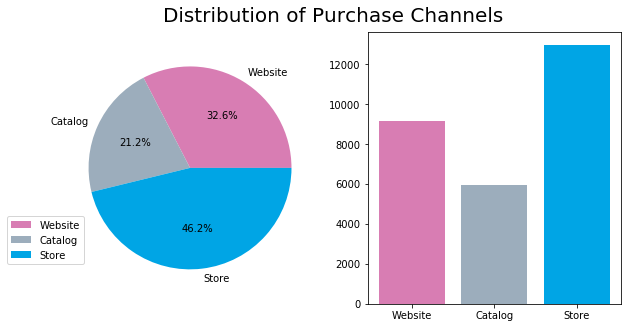

In [25]:
channels = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_labels = ['Website', 'Catalog', 'Store']
c_colors = ['#D87DB3', "#9CADBC", "#00A5E5"]
# Focus on 4 marital statuses
chan_sum = list(data[channels].sum())
fig, axs = plt.subplots(1, 2, figsize = (10, 5), squeeze=False)
fig.suptitle('Distribution of Purchase Channels', size = 20, y = 0.95)

axs[0][1].bar(channel_labels, chan_sum, color = c_colors)
axs[0][0].pie(chan_sum, colors = c_colors, labels = channel_labels, autopct = "%1.1f%%")
axs[0][0].legend(loc = 'lower right', bbox_to_anchor=(0.1, 0.1), 
                 labels = channel_labels)

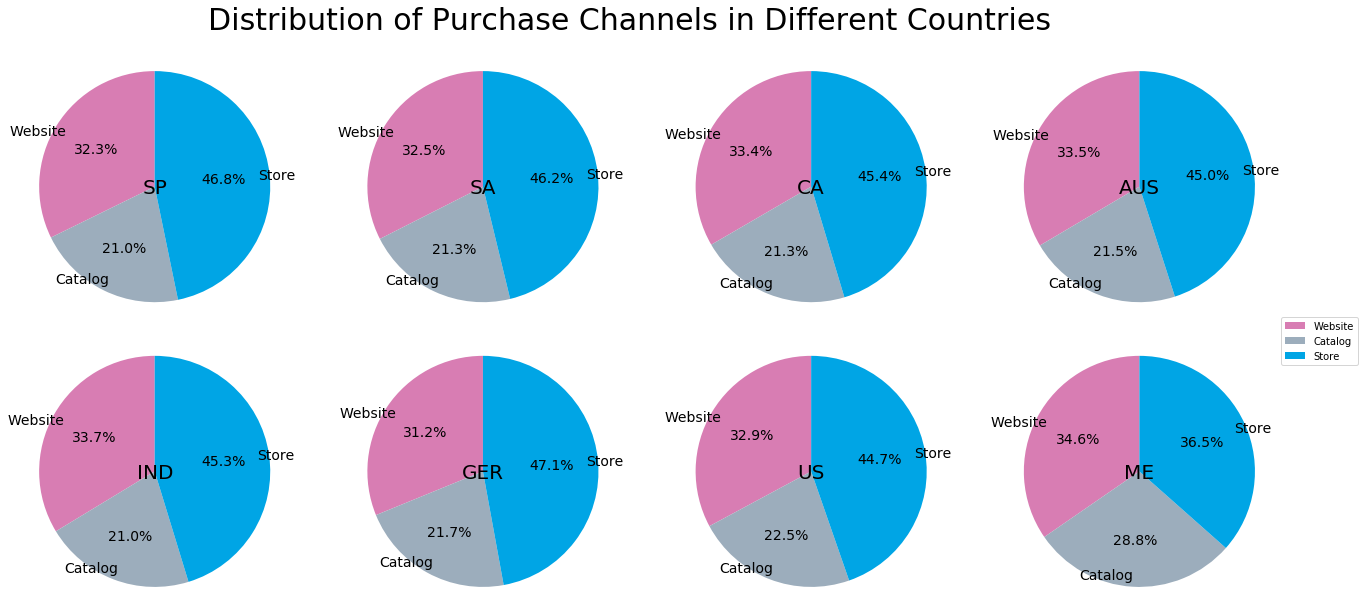

In [26]:
# No significant difference among countries
fig, axs = plt.subplots(2, 4, figsize = (20, 10), sharex = True, sharey = True,
                        gridspec_kw = {'wspace': 1.5, 'hspace':0.1})
fig.suptitle('Distribution of Purchase Channels in Different Countries', size = 30, y = 0.95)

for i in range(2):
    for j in range(4):
        # print(country_list[i][j])
        x = data[data['Country'] == country_list[i][j]]
        pur_item = list(x[channels].apply(sum))
        axs[i][j].pie(pur_item, labels = channel_labels, radius = 2.2, 
                      autopct='%1.1f%%', textprops={'fontsize': 14}, labeldistance = 0.9,
                      colors = c_colors, startangle = 90)
        axs[i][j].set_title(country_list[i][j], size = 20, y = 0.4)
axs[0][3].legend(loc = 'lower right', bbox_to_anchor=(2.2, -0.9), 
                 labels = channel_labels)

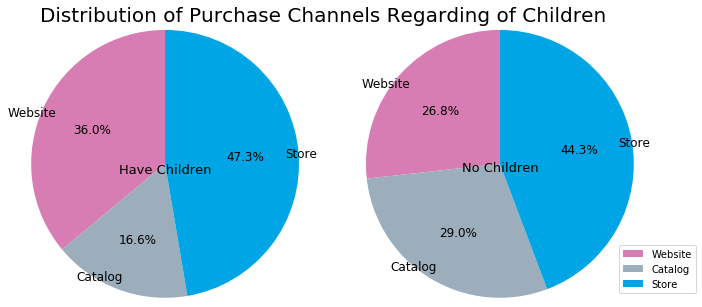

In [27]:
child_labels = ['No Child', 'Have Children']
fig, axs = plt.subplots(1, 2, figsize = (10, 5), sharex = True, sharey = True,
                        gridspec_kw = {'wspace': 0.5, 'hspace':0.1}, squeeze = False)
fig.suptitle('Distribution of Purchase Channels Regarding of Children', size = 20, y = 0.94)

yc = data[data['Children'] > 0]
yc_channel = list(yc[channels].apply(sum))

nc = data[data['Children'] == 0]
nc_channel = list(nc[channels].apply(sum))

axs[0][0].pie(yc_channel, labels = channel_labels, radius = 1.5, 
                      autopct='%1.1f%%', textprops={'fontsize': 12}, labeldistance = 0.9,
                      colors = c_colors, startangle = 90)
axs[0][0].set_title('Have Children', size = 13, y = 0.43)
axs[0][1].pie(nc_channel, labels = channel_labels, radius = 1.5, 
                      autopct='%1.1f%%', textprops={'fontsize': 12}, labeldistance = 0.9,
                      colors = c_colors, startangle = 90)
axs[0][1].set_title('No Children', size = 13, y = 0.44)
axs[0][1].legend(loc = 'lower right', bbox_to_anchor=(1.4, -0.1), 
                 labels = channel_labels)

### Recency Analysis

### Website Analysis

Average Visits： 5.32


Text(0.5, 1.0, 'Total Website Visits')

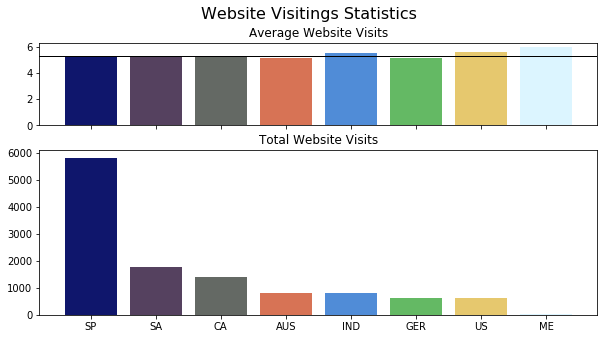

In [28]:
# data['', 'NumWebPurchases', 'NumWebVisitsMonth']
w_colors = ["#0F166C", "#55415f", "#646964", "#d77355", "#508cd7", "#64b964", "#e6c86e", "#dcf5ff"]
print("Average Visits：", np.round(np.mean(data['NumWebVisitsMonth']), 2))
countries = list(country.keys())
c_webv = []
c_mwv = []
for i in range(len(countries)):
    c = data[data['Country'] == countries[i]]
    c_webv.append(c['NumWebVisitsMonth'].sum())
    c_mwv.append(np.mean(c['NumWebVisitsMonth']))
    
fig, axs = plt.subplots(2, 1, figsize = (10, 5), squeeze = False, sharex = True, 
                        gridspec_kw = {'height_ratios':[1, 2]})
fig.suptitle('Website Visitings Statistics', size = 16)

axs[0][0].bar(countries, c_mwv, color = w_colors)
axs[0][0].axhline(y = 5.32, c = "black", linewidth=1)
axs[0][0].set_title('Average Website Visits')
axs[1][0].bar(countries, c_webv, color = w_colors)
axs[1][0].set_title('Total Website Visits')
